In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# 1 Importing Data
training_values = pd.read_csv("sample_data/assignment_2019/training_values.csv")
training_labels = pd.read_csv("sample_data/assignment_2019/training_labels.csv")
cities = pd.read_csv("sample_data/assignment_2019/cities.csv")

In [3]:
# 2 Cleaning Data
training_values.fillna(0)
training_labels.fillna(0)
cities.fillna(0)

,city,latitude,longitude,population
0,Iringa,-7.773094,35.699120,151345
1,Tabora,-5.030461,32.819431,226999
2,Mbeya,-8.909401,33.460773,270741
3,Dodoma,-6.161184,35.745426,2084000
4,Morogoro,-6.830373,37.670589,315866
5,Shinyanga,-3.680996,33.427139,1535000
6,Arusha,-3.386925,36.682995,416442
7,Bagamoyo,-6.433333,38.900002,82578
8,Dar es Salaam,-6.802353,39.279556,4365000
9,Songea,-10.676803,35.655785,203309


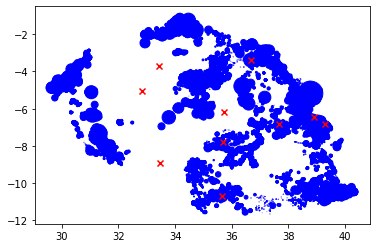

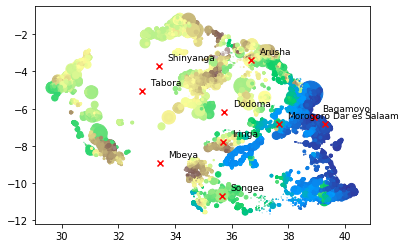

In [4]:
# 3 Plot

# 3a
users_locations = training_values[['longitude','latitude','users','gps_height']]
users_locations.columns =  ['longitude','latitude','users','gps_height']
users_locations = users_locations.replace({-2.000000e-08: np.nan,0: np.nan})
users_locations = users_locations.dropna()

plt.figure()
plt.scatter(x=users_locations['longitude'], y= users_locations['latitude'], s=users_locations['users']/50,c='b',marker = 'o')
plt.scatter(x = cities['longitude'],y=cities['latitude'], marker = 'x', color = 'r')
plt.show()

#3b
plt.figure()
plt.scatter(x=users_locations['longitude'], y=users_locations['latitude'], 
             s=users_locations['users']/50, c=users_locations['gps_height'], cmap = 'terrain')
plt.scatter(x = cities['longitude'],y=cities['latitude'], marker = 'x', color = 'r')

label = cities['city'].to_numpy()
labelx = cities['longitude'].to_numpy()
labely = cities['latitude'].to_numpy()

for i,type in enumerate(label):
    x = labelx[i]
    y = labely[i]
    plt.text(x+0.3,y+0.3,type, fontsize = 9)
plt.show()

[  82578  151345  203309  226999  270741  315866  416442 1535000 2084000
 4365000]
[284.9084895259096, 215.45668290616396, 169.3664297179546, 468.8507795100223, 113.39327940261357, 294.69647983079017, 189.73531697568558, 328.7435033686237, 243.5352319436289, 305.6019784172662]


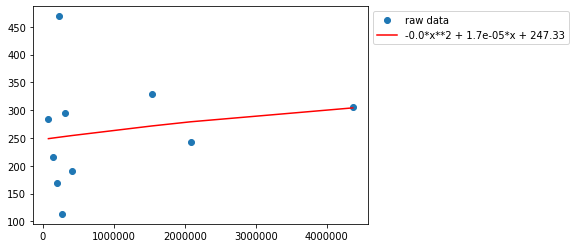

In [5]:
# 4a Extract
def distance(p_lon,p_la,c_lon,c_la):
    forx = (p_lon*np.cos(p_la/180*np.pi)) - (c_lon*np.cos(c_la/180*np.pi))
    x = 40075160/360*(forx)
    y = 40008000/360*(p_la - c_la)
    d = (x**2 + y**2)**0.5
    return d

def users(data1,data2):
    plon = data1['longitude']
    pla = data1['latitude']
    puser = data1['users']
    clon = data2['longitude']
    cla = data2['latitude']
    
    mean_users = []
    for i,j in zip(clon,cla):
        z=0;a=0
        for m,n,p in zip(plon,pla,puser):
            if distance(m,n,i,j) < 200000:
                a = a + p
                z = z + 1
        mean_users.append(a/z)
    return mean_users

# 4b Plot and fit
def fit_graph(x,a,b,c):
    y = a*x**2 +b*x+c
    return y

cities_mean = users(users_locations,cities)
x = cities['population'].to_numpy()
y = cities_mean

for i in range(0,len(x)):
    for j in range(i,len(x)):
        if x[i] > x[j]:
            constant1 = x[j]
            x[j] = x[i]
            x[i] = constant1
            constant2 = y[j]
            y[j] = y[i]
            y[i] = constant2
print(x)
print(y)

# plt.figure()
# plt.scatter(x,y,label='Data set')
# fit1 = np.polyfit(x,y,1)
# fit_1 = np.poly1d(fit1)(x)
# plt.plot(x,fit_1, label = f'{round(fit1[0],2)}*x + {round(fit1[1],2)}')
# plt.legend(bbox_to_anchor=(1,1), loc="upper left")
# plt.show()

plt.figure()
con1,con2 = curve_fit(fit_graph, x, y)
yfit = fit_graph(x, *con1)
plt.plot(x, y, 'o', label='raw data')
plt.plot(x, yfit, 'r', label= f'{round(con1[0],6)}*x**2 + {round(con1[1],6)}*x + {round(con1[2],2)}')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [6]:
# 5 
training_values['decade'] = 10*(training_values['construction_year']//10).astype(int)
training_values['function'] = training_labels['status_group']

def group_aggregate(a,b):
    group = training_values[[a,b]].astype(str)
    group = group.replace({0:np.nan})
    group = group.dropna()
    group['number'] = 1
    group = group.groupby([a,b])['number'].count().unstack().fillna(0).astype(int)
    return group


# 5 case 1
display(group_aggregate('decade','extraction_type'))

# 5 case 2
display(group_aggregate('decade','function'))

extraction_type,afridev,cemo,climax,gravity,india mark ii,india mark iii,ksb,mono,nira/tanira,other,other - mkulima/shinyanga,other - play pump,other - rope pump,other - swn 81,submersible,swn 80,walimi,windmill
decade,,,,,,,,,,,,,,,,,,
0,801,89,24,6810,727,35,379,1319,5357,2667,1,35,61,53,776,1473,46,56
1960,1,0,0,376,1,0,13,62,2,38,0,0,0,0,35,7,0,3
1970,8,0,0,2959,9,0,136,450,68,358,1,0,2,3,339,61,0,12
1980,39,0,0,2597,312,0,97,158,241,1121,0,4,1,32,583,388,0,5
1990,265,0,0,3786,248,13,65,63,987,952,0,15,72,28,290,889,1,4
2000,473,1,0,7994,736,45,533,500,1224,907,0,13,194,100,1833,750,1,26
2010,183,0,8,2258,367,5,192,313,275,387,0,18,121,13,908,102,0,11


function,functional,functional needs repair,non functional
decade,,,
0,10555,1789,8365
1960,156,42,340
1970,1406,348,2652
1980,2220,423,2935
1990,4139,518,3021
2000,9989,977,4364
2010,3794,220,1147


In [7]:
# 6 ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier   
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

training_values = pd.read_csv("sample_data/assignment_2019/training_values.csv")
training_labels = pd.read_csv("sample_data/assignment_2019/training_labels.csv")

machine = training_values.loc[:,['construction_year','extraction_type','scheme_management','region','basin',
                                 'management_group','water_quality','quality_group','district_code','region_code',
                                 'quantity', 'quantity_group','installer', 
                                 'source', 'source_type','waterpoint_type']]

machine['function'] = training_labels.loc[:,'status_group']
machine = machine.replace({0:np.nan})
machine = machine.dropna()

for feature in machine.columns:
    if feature != 'construction_year':
        a = list(machine.loc[:,feature].unique())
        for n, m in enumerate(a):
            machine = machine.replace({m: n})

X_train, X_test, y_train, y_test = train_test_split(machine.loc[:,:'waterpoint_type'],
                                                    machine.loc[:,'function'],            
                                                    random_state=0)

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
print(f"knn: {(knn.score(X_test, y_test))}")

tree = DecisionTreeClassifier(random_state=0) 
tree.fit(X_train, y_train) 
print(f"tree: {tree.score(X_test, y_test)}")

mlp = MLPClassifier(solver='lbfgs', random_state=3).fit(X_train,y_train)
print(f"ANN: {mlp.score(X_test,y_test)}")

clf=RandomForestClassifier(n_estimators=250)
clf.fit(X_train,y_train)
print(f"rf: {clf.score(X_test,y_test)}")

knn: 0.7622593950504125
tree: 0.7805912007332723
ANN: 0.33741979835013747
rf: 0.7931943171402384


In [8]:
# pca = PCA(n_components=10)
# pca.fit(X_train,y_train)
# print(pca.components_)

# prediction
predict_values = pd.read_csv("sample_data/assignment_2019/test_values.csv")

X_predict = predict_values.loc[:,['construction_year','extraction_type','scheme_management','region','basin',
                                 'management_group','water_quality','quality_group','district_code','region_code',
                                 'quantity', 'quantity_group','installer', 
                                 'source', 'source_type','waterpoint_type']]

for feature in X_predict.columns:
    if feature != 'construction_year':
        a = list(X_predict.loc[:,feature].unique())
        for n, m in enumerate(a):
            X_predict = X_predict.replace({m: n})

file =  predict_values[['id']]
file['status_group'] = clf.predict(X_predict)
file['status_group'] = file['status_group'].replace({0:'functional',1:'non functional',2:'functional needs repair'})

import csv

a = file.to_numpy()
fnameCSV = 'SubmissionFormat.csv'

with open(fnameCSV, 'w') as fid:    
    writer = csv.writer(fid)
    writer.writerow("id,status_group")
    for aa in a:        
        writer.writerow(aa)

/Users/boomchawit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/boomchawit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
